In [35]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\Master_Folder\Data Science Course\Projects\StockMarket\stock_data\SUZLON.NS_2024-01-01_to_2024-11-09.csv', usecols=['Date','Adj Close', 'High', 'Low', 'Open', 'Up_Probability', 'Down_Probability'])

In [3]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [4]:
data.head()

,Adj Close,High,Low,Open,Up_Probability,Down_Probability
Date,,,,,,
2024-03-13,37.35,39.3,37.35,38.50,20.0,70.0
2024-03-14,39.05,39.2,35.50,35.50,7.5,77.5
2024-03-15,39.40,40.0,37.50,39.00,7.5,77.5
2024-03-18,38.55,38.9,37.70,38.85,5.0,75.0
2024-03-19,37.15,38.4,36.80,38.40,5.0,75.0


In [5]:
# Generating time features
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday # 0 Monday, 6 Sunday
data['Month'] = data.index.month
data['Year'] = data.index.year


In [6]:
data.head()

,Adj Close,High,Low,Open,Up_Probability,Down_Probability,Day,Weekday,Month,Year
Date,,,,,,,,,,
2024-03-13,37.35,39.3,37.35,38.50,20.0,70.0,13,2,3,2024
2024-03-14,39.05,39.2,35.50,35.50,7.5,77.5,14,3,3,2024
2024-03-15,39.40,40.0,37.50,39.00,7.5,77.5,15,4,3,2024
2024-03-18,38.55,38.9,37.70,38.85,5.0,75.0,18,0,3,2024
2024-03-19,37.15,38.4,36.80,38.40,5.0,75.0,19,1,3,2024


In [7]:
# Generate lag feature for close price
for lag in range(1, 4):
    data[f'Adj_Close_Lag_{lag}'] = data['Adj Close'].shift(lag)

# Drop rows with NaN values created due to lagging
data.dropna(inplace=True)


In [8]:
data.head()

,Adj Close,High,Low,Open,Up_Probability,Down_Probability,Day,Weekday,Month,Year,Adj_Close_Lag_1,Adj_Close_Lag_2
Date,,,,,,,,,,,,
2024-03-15,39.40,40.0,37.5,39.00,7.5,77.5,15,4,3,2024,39.05,37.35
2024-03-18,38.55,38.9,37.7,38.85,5.0,75.0,18,0,3,2024,39.40,39.05
2024-03-19,37.15,38.4,36.8,38.40,5.0,75.0,19,1,3,2024,38.55,39.40
2024-03-20,36.30,37.7,35.6,37.15,5.0,75.0,20,2,3,2024,37.15,38.55
2024-03-21,37.30,38.1,36.5,37.00,10.0,70.0,21,3,3,2024,36.30,37.15


In [9]:
data = data[['Day', 'Weekday', 'Month', 'Year', 'Open', 'High', 'Low', 'Adj Close', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 'Up_Probability', 'Down_Probability']]
data.head()

,Day,Weekday,Month,Year,Open,High,Low,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Up_Probability,Down_Probability
Date,,,,,,,,,,,,
2024-03-15,15,4,3,2024,39.00,40.0,37.5,39.40,39.05,37.35,7.5,77.5
2024-03-18,18,0,3,2024,38.85,38.9,37.7,38.55,39.40,39.05,5.0,75.0
2024-03-19,19,1,3,2024,38.40,38.4,36.8,37.15,38.55,39.40,5.0,75.0
2024-03-20,20,2,3,2024,37.15,37.7,35.6,36.30,37.15,38.55,5.0,75.0
2024-03-21,21,3,3,2024,37.00,38.1,36.5,37.30,36.30,37.15,10.0,70.0


In [10]:
data['Target_Adj_Close'] = data['Adj Close'].shift(-1)

In [11]:
data.head()

,Day,Weekday,Month,Year,Open,High,Low,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Up_Probability,Down_Probability,Target_Adj_Close
Date,,,,,,,,,,,,,
2024-03-15,15,4,3,2024,39.00,40.0,37.5,39.40,39.05,37.35,7.5,77.5,38.55
2024-03-18,18,0,3,2024,38.85,38.9,37.7,38.55,39.40,39.05,5.0,75.0,37.15
2024-03-19,19,1,3,2024,38.40,38.4,36.8,37.15,38.55,39.40,5.0,75.0,36.30
2024-03-20,20,2,3,2024,37.15,37.7,35.6,36.30,37.15,38.55,5.0,75.0,37.30
2024-03-21,21,3,3,2024,37.00,38.1,36.5,37.30,36.30,37.15,10.0,70.0,37.35


In [26]:
data.dropna(inplace=True)
data.tail()


,Day,Weekday,Month,Year,Open,High,Low,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Up_Probability,Down_Probability,Target_Adj_Close
Date,,,,,,,,,,,,,
2024-11-01,1,4,11,2024,67.30,68.40,67.20,68.14,66.95,68.13,5.0,75.0,66.32
2024-11-04,4,0,11,2024,68.19,68.24,65.20,66.32,68.14,66.95,5.0,75.0,67.37
2024-11-05,5,1,11,2024,66.30,68.25,65.53,67.37,66.32,68.14,5.0,75.0,69.32
2024-11-06,6,2,11,2024,68.00,69.85,67.42,69.32,67.37,66.32,20.0,60.0,66.80
2024-11-07,7,3,11,2024,69.45,69.45,66.44,66.80,69.32,67.37,20.0,60.0,62.50


In [27]:
# Features X and Target y
X = data[['Day', 'Weekday', 'Month', 'Year', 'Open', 'High', 'Low', 'Adj Close', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 'Up_Probability', 'Down_Probability']]

y = data['Target_Adj_Close']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:

print(y_train.isnull().sum())
print(y_test.isnull().sum())


0
0


In [31]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(mse, r2)

8.21923364906257 0.6709521921887649


In [33]:
print(y_pred)

[82.3968 82.4086 82.5785 81.7764 80.0685 79.8143 75.0955 75.2134 74.3423
 73.3939 79.4908 76.2194 75.6096 76.4849 76.5085 75.9237 76.478  75.9282
 74.6672 69.5407 69.0439 70.0621 69.1651 71.3901 70.8256 69.4132 69.0183
 69.2743 68.1412 68.8172 68.8983 68.9678]


In [34]:
print(y_test)

Date
2024-09-24    82.96
2024-09-25    81.84
2024-09-26    81.09
2024-09-27    80.05
2024-09-30    79.74
2024-10-01    75.75
2024-10-03    74.67
2024-10-04    70.93
2024-10-07    73.64
2024-10-08    76.69
2024-10-09    75.44
2024-10-10    74.39
2024-10-11    74.01
2024-10-14    73.71
2024-10-15    75.05
2024-10-16    73.01
2024-10-17    72.19
2024-10-18    70.63
2024-10-21    68.56
2024-10-22    68.85
2024-10-23    69.15
2024-10-24    67.47
2024-10-25    70.84
2024-10-28    68.87
2024-10-29    68.13
2024-10-30    66.95
2024-10-31    68.14
2024-11-01    66.32
2024-11-04    67.37
2024-11-05    69.32
2024-11-06    66.80
2024-11-07    62.50
Name: Target_Adj_Close, dtype: float64


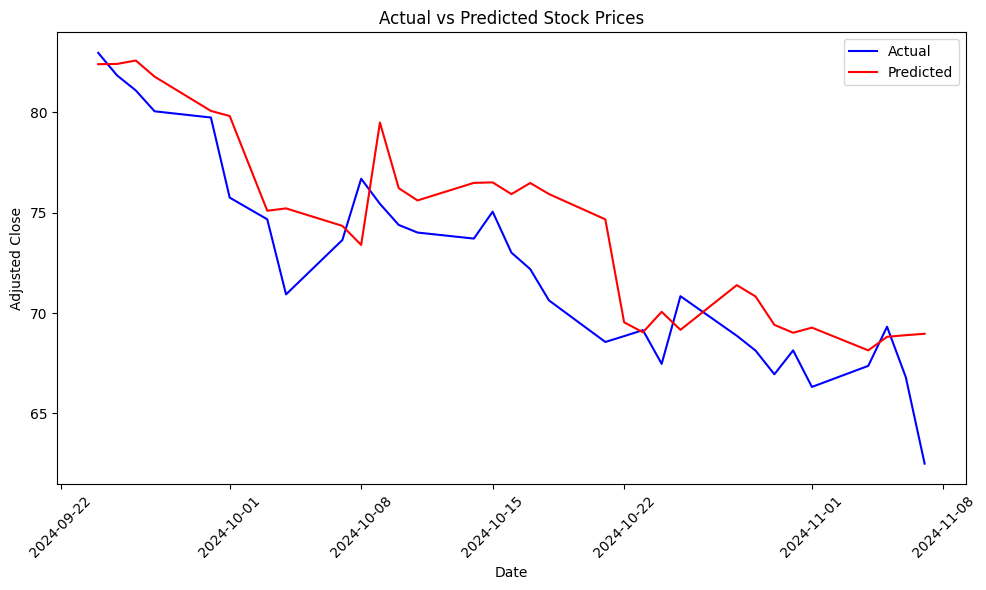

In [38]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label="Actual", color='blue')
plt.plot(data.index[-len(y_pred):], y_pred, label="Predicted", color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
data['Target_Class'] = (data['Up_Probability'] > data['Down_Probability']).astype(int)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2024-03-15 to 2024-11-07
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Day               160 non-null    int32  
 1   Weekday           160 non-null    int32  
 2   Month             160 non-null    int32  
 3   Year              160 non-null    int32  
 4   Open              160 non-null    float64
 5   High              160 non-null    float64
 6   Low               160 non-null    float64
 7   Adj Close         160 non-null    float64
 8   Adj_Close_Lag_1   160 non-null    float64
 9   Adj_Close_Lag_2   160 non-null    float64
 10  Up_Probability    160 non-null    float64
 11  Down_Probability  160 non-null    float64
 12  Target_Adj_Close  160 non-null    float64
 13  Target_Class      160 non-null    int32  
dtypes: float64(9), int32(5)
memory usage: 15.6 KB


In [45]:
data.sample(20)

,Day,Weekday,Month,Year,Open,High,Low,Adj Close,Adj_Close_Lag_1,Adj_Close_Lag_2,Up_Probability,Down_Probability,Target_Adj_Close,Target_Class
Date,,,,,,,,,,,,,,
2024-10-15,15,1,10,2024,74.10,74.24,72.15,73.71,74.01,74.39,30.0,50.0,75.05,0
2024-08-13,13,1,8,2024,81.97,84.29,78.35,80.79,80.36,76.54,67.5,17.5,76.77,1
2024-07-03,3,2,7,2024,53.10,53.95,53.00,53.53,53.03,52.93,55.0,25.0,54.03,1
2024-07-31,31,2,7,2024,70.11,70.89,68.28,69.38,68.22,64.98,67.5,27.5,67.98,1
2024-05-22,22,2,5,2024,44.50,46.25,42.95,46.00,44.05,42.60,72.5,22.5,48.30,1
2024-10-17,17,3,10,2024,75.39,75.45,72.40,73.01,75.05,73.71,25.0,55.0,72.19,0
2024-10-16,16,2,10,2024,73.71,75.65,73.52,75.05,73.71,74.01,25.0,55.0,73.01,0
2024-07-01,1,0,7,2024,53.20,53.28,52.59,52.93,52.86,53.28,70.0,10.0,53.03,1
2024-04-29,29,0,4,2024,41.85,42.00,41.40,41.60,41.65,42.15,50.0,30.0,41.60,1


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define the target variable based on the conditions (as per your requirement)
def classify_stock_action(row):
    if row['Up_Probability'] >= 70 and row['Up_Probability'] > row['Down_Probability']:
        return 1  # Buy
    elif row['Down_Probability'] >= 70 and row['Down_Probability'] > row['Up_Probability']:
        return 0  # Sell
    else:
        return 2  # Hold

# Apply the classification function to each row
data['Target_Action'] = data.apply(classify_stock_action, axis=1)

# Select the features (exclude non-numeric columns and target column)
features = ['Up_Probability', 'Down_Probability', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2']
X = data[features]  # Features
y = data['Target_Action']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for many classification models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier (Random Forest in this case)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
[[ 2  0  0]
 [ 0  6  0]
 [ 0  0 24]]
Accuracy Score:
1.0


In [47]:
print(y_pred)

[2 2 2 1 1 2 2 1 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 0 2 1 2 1 2 2]


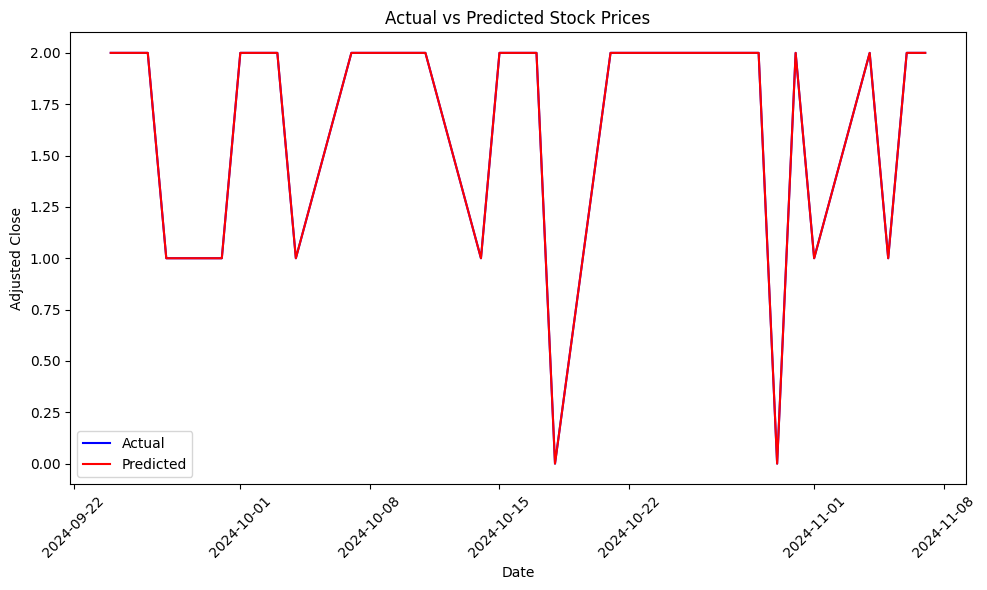

In [48]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label="Actual", color='blue')
plt.plot(data.index[-len(y_pred):], y_pred, label="Predicted", color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()